### Packages

In [40]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### Reading in and Cleaning the Data

In [6]:
## Reading in lyrics_dataframe
lyrics = pd.read_csv("lyrics_dataframe.csv")

In [7]:
display(lyrics)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
4    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                   Searched Artist  \
0              2 Chainz          2 Chainz featuring Drake   
1           2 Live Crew                       2 Live Crew   
2           2 Live Crew                       2 Live Crew   
3                  2Pac                              2Pac   
4                  2Pac                              2Pac   
..                  ...                               ...   
359               Jeezy  Young Jeezy featuring Kanye West   
360         Young Money       Young Money featuring Lloyd   
361      YoungBloodâ€‹Z     YoungBloodz featuring Lil Jon   
362               Yo-Yo          Yo-Yo featuring Ice Cube   
363            Yung Joc                          Yung Joc   

                                                Lyrics        Date    State  
0    eardrummers mike will made it yah tru 2 chainz...    9/8/2012  GA, CAN  
1    whatll we get for 10 dollars every ting you wa...   11/4/1989       CA  
2    government of the people for the people by the...   8/25/1990       CA  
3    1\tall bout u original version 2\tall out/die ...   3/11/1995       CA  
4    1\tall bout u original version 2\tall out/die ...   3/25/1995       CA  
..                                                 ...         ...      ...  
359  i put on i put on i put on i put on for my cit...   9/13/2008       GA  
360  i i i i can make your bed rock young money i i...   1/23/2010       LA  
361  they calling me to come back to the streets se...  10/18/2003       GA  
362  yo jinx man we gotta find somebody thats down ...   5/25/1991       CA  
363  here we go again ghettoville usa uh oh you kno...   6/10/2006       GA  

[364 rows x 7 columns]

In [16]:
## Dropping duplicate rows
lyrics_no_duplicates = lyrics.drop_duplicates(subset=["Searched Song"])
display(lyrics_no_duplicates)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
7                            How Do U Want It              How Do U Want It   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                                    Searched Artist  \
0              2 Chainz                           2 Chainz featuring Drake   
1           2 Live Crew                                        2 Live Crew   
2           2 Live Crew                                        2 Live Crew   
3                  2Pac                                               2Pac   
7                  2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
..                  ...                                                ...   
359               Jeezy                   Young Jeezy featuring Kanye West   
360         Young Money                        Young Money featuring Lloyd   
361      YoungBloodâ€‹Z                      YoungBloodz featuring Lil Jon   
362               Yo-Yo                           Yo-Yo featuring Ice Cube   
363            Yung Joc                                           Yung Joc   

                                                Lyrics        Date    State  
0    eardrummers mike will made it yah tru 2 chainz...    9/8/2012  GA, CAN  
1    whatll we get for 10 dollars every ting you wa...   11/4/1989       CA  
2    government of the people for the people by the...   8/25/1990       CA  
3    1\tall bout u original version 2\tall out/die ...   3/11/1995       CA  
7    how do you want it how do you feel comin up as...   5/11/1996   CA, NC  
..                                                 ...         ...      ...  
359  i put on i put on i put on i put on for my cit...   9/13/2008       GA  
360  i i i i can make your bed rock young money i i...   1/23/2010       LA  
361  they calling me to come back to the streets se...  10/18/2003       GA  
362  yo jinx man we gotta find somebody thats down ...   5/25/1991       CA  
363  here we go again ghettoville usa uh oh you kno...   6/10/2006       GA  

[329 rows x 7 columns]

In [17]:
## Splitting out state column by ","
lyrics_no_duplicates = pd.concat([lyrics_no_duplicates,lyrics_no_duplicates.State.str.split(',',expand=True)],1)
#display(lyrics_no_duplicates)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
7                            How Do U Want It              How Do U Want It   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                                    Searched Artist  \
0              2 Chainz                           2 Chainz featuring Drake   
1           2 Live Crew                                        2 Live Crew   
2           2 Live Crew                                        2 Live Crew   
3                  2Pac                                               2Pac   
7                  2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
..                  ...                                                ...   
359               Jeezy                   Young Jeezy featuring Kanye West   
360         Young Money                        Young Money featuring Lloyd   
361      YoungBloodâ€‹Z                      YoungBloodz featuring Lil Jon   
362               Yo-Yo                           Yo-Yo featuring Ice Cube   
363            Yung Joc                                           Yung Joc   

                                                Lyrics        Date    State  \
0    eardrummers mike will made it yah tru 2 chainz...    9/8/2012  GA, CAN   
1    whatll we get for 10 dollars every ting you wa...   11/4/1989       CA   
2    government of the people for the people by the...   8/25/1990       CA   
3    1\tall bout u original version 2\tall out/die ...   3/11/1995       CA   
7    how do you want it how do you feel comin up as...   5/11/1996   CA, NC   
..                                                 ...         ...      ...   
359  i put on i put on i put on i put on for my cit...   9/13/2008       GA   
360  i i i i can make your bed rock young money i i...   1/23/2010       LA   
361  they calling me to come back to the streets se...  10/18/2003       GA   
362  yo jinx man we gotta find somebody thats down ...   5/25/1991       CA   
363  here we go again ghettoville usa uh oh you kno...   6/10/2006       GA   

      0     1     2     3  
0    GA   CAN  None  None  
1    CA  None  None  None  
2    CA  None  None  None  
3    CA  None  None  None  
7    CA    NC  None  None  
..   ..   ...   ...   ...  
359  GA  None  None  None  
360  LA  None  None  None  
361  GA  None  None  None  
362  CA  None  None  None  
363  GA  None  None  None  

[329 rows x 11 columns]

In [19]:
## Renaming new columns added for states
lyrics_no_duplicates = lyrics_no_duplicates.rename({0 : "Art.State", 1 : "Ft.State1", 2 : "Ft.State2", 3 : "Ft.State3"}, axis = "columns")
display(lyrics_no_duplicates)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
7                            How Do U Want It              How Do U Want It   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                                    Searched Artist  \
0              2 Chainz                           2 Chainz featuring Drake   
1           2 Live Crew                                        2 Live Crew   
2           2 Live Crew                                        2 Live Crew   
3                  2Pac                                               2Pac   
7                  2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
..                  ...                                                ...   
359               Jeezy                   Young Jeezy featuring Kanye West   
360         Young Money                        Young Money featuring Lloyd   
361      YoungBloodâ€‹Z                      YoungBloodz featuring Lil Jon   
362               Yo-Yo                           Yo-Yo featuring Ice Cube   
363            Yung Joc                                           Yung Joc   

                                                Lyrics        Date    State  \
0    eardrummers mike will made it yah tru 2 chainz...    9/8/2012  GA, CAN   
1    whatll we get for 10 dollars every ting you wa...   11/4/1989       CA   
2    government of the people for the people by the...   8/25/1990       CA   
3    1\tall bout u original version 2\tall out/die ...   3/11/1995       CA   
7    how do you want it how do you feel comin up as...   5/11/1996   CA, NC   
..                                                 ...         ...      ...   
359  i put on i put on i put on i put on for my cit...   9/13/2008       GA   
360  i i i i can make your bed rock young money i i...   1/23/2010       LA   
361  they calling me to come back to the streets se...  10/18/2003       GA   
362  yo jinx man we gotta find somebody thats down ...   5/25/1991       CA   
363  here we go again ghettoville usa uh oh you kno...   6/10/2006       GA   

    Art.State Ft.State1 Ft.State2 Ft.State3  
0          GA       CAN      None      None  
1          CA      None      None      None  
2          CA      None      None      None  
3          CA      None      None      None  
7          CA        NC      None      None  
..        ...       ...       ...       ...  
359        GA      None      None      None  
360        LA      None      None      None  
361        GA      None      None      None  
362        CA      None      None      None  
363        GA      None      None      None  

[329 rows x 11 columns]

In [13]:
## Adding regionDict to create Region column
regionDict = {'CA': 'West Coast',
              'NY': 'East Coast',
              'LA': 'South',
              'FL': 'South',
              'MD': 'East Coast',
              'GA': 'South',
              'OH': 'Midwest',
              'MI': 'Midwest',
              'TX': 'South',
              'MO': 'Midwest',
              'NJ': 'East Coast',
              'WI': 'Midwest',
              'IL': 'Midwest',
              'PA': 'East Coast',
              'CAN': 'Canada',
              'MA': 'East Coast',
              'WA': 'West Coast',
              'VA': 'East Coast',
              'EU': 'Europe',
              'DC': 'East Coast',
              'NC': 'East Coast',
              'MS': 'South'}

In [21]:
## Matching the Artist State to regionDict and populating Region column
lyrics_no_duplicates["Region"] = lyrics_no_duplicates["Art.State"].map(regionDict)

In [22]:
display(lyrics_no_duplicates)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
7                            How Do U Want It              How Do U Want It   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                                    Searched Artist  \
0              2 Chainz                           2 Chainz featuring Drake   
1           2 Live Crew                                        2 Live Crew   
2           2 Live Crew                                        2 Live Crew   
3                  2Pac                                               2Pac   
7                  2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
..                  ...                                                ...   
359               Jeezy                   Young Jeezy featuring Kanye West   
360         Young Money                        Young Money featuring Lloyd   
361      YoungBloodâ€‹Z                      YoungBloodz featuring Lil Jon   
362               Yo-Yo                           Yo-Yo featuring Ice Cube   
363            Yung Joc                                           Yung Joc   

                                                Lyrics        Date    State  \
0    eardrummers mike will made it yah tru 2 chainz...    9/8/2012  GA, CAN   
1    whatll we get for 10 dollars every ting you wa...   11/4/1989       CA   
2    government of the people for the people by the...   8/25/1990       CA   
3    1\tall bout u original version 2\tall out/die ...   3/11/1995       CA   
7    how do you want it how do you feel comin up as...   5/11/1996   CA, NC   
..                                                 ...         ...      ...   
359  i put on i put on i put on i put on for my cit...   9/13/2008       GA   
360  i i i i can make your bed rock young money i i...   1/23/2010       LA   
361  they calling me to come back to the streets se...  10/18/2003       GA   
362  yo jinx man we gotta find somebody thats down ...   5/25/1991       CA   
363  here we go again ghettoville usa uh oh you kno...   6/10/2006       GA   

    Art.State Ft.State1 Ft.State2 Ft.State3      Region  
0          GA       CAN      None      None       South  
1          CA      None      None      None  West Coast  
2          CA      None      None      None  West Coast  
3          CA      None      None      None  West Coast  
7          CA        NC      None      None  West Coast  
..        ...       ...       ...       ...         ...  
359        GA      None      None      None       South  
360        LA      None      None      None       South  
361        GA      None      None      None       South  
362        CA      None      None      None  West Coast  
363        GA      None      None      None       South  

[329 rows x 12 columns]

In [23]:
lyrics_no_duplicates["Region"].value_counts()

East Coast    149
South          83
Midwest        36
West Coast     36
Canada         14
Europe          3
Name: Region, dtype: int64

In [33]:
## Subsetting data frame by U.S. Regions
## East Coast
lyrics_EastCoast = lyrics_no_duplicates[lyrics_no_duplicates["Region"] == "East Coast"]

## South
lyrics_South = lyrics_no_duplicates[lyrics_no_duplicates["Region"] == "South"]

## Midwest
lyrics_Midwest = lyrics_no_duplicates[lyrics_no_duplicates["Region"] == "Midwest"]

## West Coast
lyrics_WestCoast = lyrics_no_duplicates[lyrics_no_duplicates["Region"] == "West Coast"]

## World
lyrics_World = lyrics_no_duplicates[(lyrics_no_duplicates["Region"] == "Canada") | (lyrics_no_duplicates["Region"] == "Europe")]

In [37]:
display(lyrics_EastCoast.head(5))
display(lyrics_South.head(5))
display(lyrics_Midwest.head(5))
display(lyrics_WestCoast.head(5))
display(lyrics_World.head(5))

Title(from Genius)        Searched Song Artist(from Genius)  \
9   Pop Goes the Weasel  Pop Goes the Weasel            3rd Bass   
10           In da Club          In da Club              50 Cent   
11             P.I.M.P.             P.I.M.P.             50 Cent   
12    Just a Lilâ€™ Bit       Just a Lil Bit             50 Cent   
13         21 Questions         21 Questions             50 Cent   

                Searched Artist  \
9                      3rd Bass   
10                      50 Cent   
11                      50 Cent   
12                      50 Cent   
13  50 Cent featuring Nate Dogg   

                                               Lyrics       Date   State  \
9   antoine antoines got something here ro roll th...  7/13/1991      NY   
10  go go go go go go go shawty its your birthday ...   2/8/2003      NY   
11  i dont know what you heard about me but a bitc...  8/23/2003      NY   
12  yeah shady aftermath g unit damn baby all i ne...  5/21/2005      NY   
13  new york city you are now rappin with 50 cent ...   5/3/2003  NY, CA   

   Art.State Ft.State1 Ft.State2 Ft.State3      Region  
9         NY      None      None      None  East Coast  
10        NY      None      None      None  East Coast  
11        NY      None      None      None  East Coast  
12        NY      None      None      None  East Coast  
13        NY        CA      None      None  East Coast

Title(from Genius)    Searched Song   Artist(from Genius)  \
0              No Lie           No Lie              2 Chainz   
15      Wobble Wobble    Wobble Wobble              504 Boyz   
16       Tootsee Roll     Tootsee Roll               69 Boyz   
23          Tennessee        Tennessee  Arrested Development   
24    People Everyday  People Everyday  Arrested Development   

             Searched Artist  \
0   2 Chainz featuring Drake   
15                  504 Boyz   
16                   69 Boyz   
23      Arrested Development   
24      Arrested Development   

                                               Lyrics       Date    State  \
0   eardrummers mike will made it yah tru 2 chainz...   9/8/2012  GA, CAN   
15  yo this jay tweezie keepin it live off the hee...  4/15/2000       LA   
16  the butterfly uh uh thats old let me see the t...   9/3/1994       FL   
23  lord ive really been real stressed down and ou...  5/23/1992       GA   
24  see i was restin at the park mindin my own bus...  9/19/1992       GA   

   Art.State Ft.State1 Ft.State2 Ft.State3 Region  
0         GA       CAN      None      None  South  
15        LA      None      None      None  South  
16        FL      None      None      None  South  
23        GA      None      None      None  South  
24        GA      None      None      None  South

Title(from Genius)          Searched Song  \
28                                     My Last                My Last   
29                     I Donâ€™t Fuck With You  I Don't Fuck with You   
34  Hip-Hopâ€™s Mourning/ Remembrance Playlist         Tha Crossroads   
35                                      Deeper                 Deeper   
36                             Recipe of a Hoe        Recipe of a Hoe   

                                Artist(from Genius)  \
28                                         Big Sean   
29                                         Big Sean   
34  Prof. James Braxton Peterson, DJ Just B. Semple   
35                                             Bo$$   
36                                             Bo$$   

                   Searched Artist  \
28  Big Sean featuring Chris Brown   
29         Big Sean featuring E-40   
34            Bone Thugs-n-Harmony   
35                            Boss   
36                            Boss   

                                               Lyrics        Date   State  \
28  hands up in the air i just want the i just wan...    7/2/2011  MI, VA   
29  uh fuck i dont fuck with you you lil stupid as...   12/6/2014  MI, CA   
34  this playlist was created to better understand...   5/11/1996      OH   
35  cha cha cha hey watch out rude bwoy you see ho...   5/29/1993      MI   
36  guess who the down ass bitch bo speakin on how...  10/23/1993      MI   

   Art.State Ft.State1 Ft.State2 Ft.State3   Region  
28        MI        VA      None      None  Midwest  
29        MI        CA      None      None  Midwest  
34        OH      None      None      None  Midwest  
35        MI      None      None      None  Midwest  
36        MI      None      None      None  Midwest

Title(from Genius)           Searched Song  \
1                                Me So Horny             Me So Horny   
2                       Banned in the U.S.A.    Banned in the U.S.A.   
3   Unreleased Songs [Full Discography List]  Dear Mama / Old School   
7                           How Do U Want It        How Do U Want It   
20                                Murder Rap              Murder Rap   

   Artist(from Genius)                                    Searched Artist  \
1          2 Live Crew                                        2 Live Crew   
2          2 Live Crew                                        2 Live Crew   
3                 2Pac                                               2Pac   
7                 2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
20       Above the Law                                      Above the Law   

                                               Lyrics       Date   State  \
1   whatll we get for 10 dollars every ting you wa...  11/4/1989      CA   
2   government of the people for the people by the...  8/25/1990      CA   
3   1\tall bout u original version 2\tall out/die ...  3/11/1995      CA   
7   how do you want it how do you feel comin up as...  5/11/1996  CA, NC   
20  yo cold 187 they tryin to give you a murder ra...  4/21/1990      CA   

   Art.State Ft.State1 Ft.State2 Ft.State3      Region  
1         CA      None      None      None  West Coast  
2         CA      None      None      None  West Coast  
3         CA      None      None      None  West Coast  
7         CA        NC      None      None  West Coast  
20        CA      None      None      None  West Coast

Title(from Genius)     Searched Song Artist(from Genius) Searched Artist  \
88    Best I Ever Had  Best I Ever Had                Drake           Drake   
89               Over              Over               Drake           Drake   
90          Headlines         Headlines               Drake           Drake   
91      Hotline Bling     Hotline Bling               Drake           Drake   
92     Summer Sixteen    Summer Sixteen               Drake           Drake   

                                               Lyrics        Date State  \
88  you know a lot of girls be thinkin my songs ar...   6/13/2009   CAN   
89  uh uh young money yeah yeah yeah i know way to...   6/12/2010   CAN   
90  i might be too strung out on compliments overd...  10/15/2011   CAN   
91  you used to call me on my you used to you used...  10/10/2015   CAN   
92  looking looking looking looking looking lookin...   2/20/2016   CAN   

   Art.State Ft.State1 Ft.State2 Ft.State3  Region  
88       CAN      None      None      None  Canada  
89       CAN      None      None      None  Canada  
90       CAN      None      None      None  Canada  
91       CAN      None      None      None  Canada  
92       CAN      None      None      None  Canada

In [221]:
lyrics_no_duplicates["Date"] = pd.to_datetime(lyrics_no_duplicates["Date"], infer_datetime_format=True)

In [223]:
display(lyrics_no_duplicates)

Title(from Genius)                 Searched Song  \
0                                      No Lie                        No Lie   
1                                 Me So Horny                   Me So Horny   
2                        Banned in the U.S.A.          Banned in the U.S.A.   
3    Unreleased Songs [Full Discography List]        Dear Mama / Old School   
7                            How Do U Want It              How Do U Want It   
..                                        ...                           ...   
359                                    Put On                        Put On   
360                                   BedRock                       BedRock   
361                                     Damn!                         Damn!   
362            You Canâ€™t Play With My Yo-Yo  You Can't Play with My Yo-Yo   
363                       Itâ€™s Goinâ€™ Down              It's Goin' Down    

    Artist(from Genius)                                    Searched Artist  \
0              2 Chainz                           2 Chainz featuring Drake   
1           2 Live Crew                                        2 Live Crew   
2           2 Live Crew                                        2 Live Crew   
3                  2Pac                                               2Pac   
7                  2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
..                  ...                                                ...   
359               Jeezy                   Young Jeezy featuring Kanye West   
360         Young Money                        Young Money featuring Lloyd   
361      YoungBloodâ€‹Z                      YoungBloodz featuring Lil Jon   
362               Yo-Yo                           Yo-Yo featuring Ice Cube   
363            Yung Joc                                           Yung Joc   

                                                Lyrics       Date    State  \
0    eardrummers mike will made it yah tru 2 chainz... 2012-09-08  GA, CAN   
1    whatll we get for 10 dollars every ting you wa... 1989-11-04       CA   
2    government of the people for the people by the... 1990-08-25       CA   
3    1\tall bout u original version 2\tall out/die ... 1995-03-11       CA   
7    how do you want it how do you feel comin up as... 1996-05-11   CA, NC   
..                                                 ...        ...      ...   
359  i put on i put on i put on i put on for my cit... 2008-09-13       GA   
360  i i i i can make your bed rock young money i i... 2010-01-23       LA   
361  they calling me to come back to the streets se... 2003-10-18       GA   
362  yo jinx man we gotta find somebody thats down ... 1991-05-25       CA   
363  here we go again ghettoville usa uh oh you kno... 2006-06-10       GA   

    Art.State Ft.State1 Ft.State2 Ft.State3      Region  
0          GA       CAN      None      None       South  
1          CA      None      None      None  West Coast  
2          CA      None      None      None  West Coast  
3          CA      None      None      None  West Coast  
7          CA        NC      None      None  West Coast  
..        ...       ...       ...       ...         ...  
359        GA      None      None      None       South  
360        LA      None      None      None       South  
361        GA      None      None      None       South  
362        CA      None      None      None  West Coast  
363        GA      None      None      None       South  

[329 rows x 12 columns]

In [229]:
## Subsetting data frame by Date
import datetime

## 1990s
lyrics_nineties = lyrics_no_duplicates[(lyrics_no_duplicates["Date"]>datetime.datetime(1989,1,1)) & (lyrics_no_duplicates["Date"]<datetime.datetime(2000,1,1))]  

## 2000s
lyrics_zeros = lyrics_no_duplicates[(lyrics_no_duplicates["Date"]>datetime.datetime(2001,1,1)) & (lyrics_no_duplicates["Date"]<datetime.datetime(2010,1,1))]  

## 2010s
lyrics_tens = lyrics_no_duplicates[(lyrics_no_duplicates["Date"]>datetime.datetime(2010,1,1)) & (lyrics_no_duplicates["Date"]<datetime.datetime(2020,1,1))]  

In [230]:
display(lyrics_nineties.head(5))
display(lyrics_zeros.head(5))
display(lyrics_tens.head(5))

Title(from Genius)           Searched Song  \
1                               Me So Horny             Me So Horny   
2                      Banned in the U.S.A.    Banned in the U.S.A.   
3  Unreleased Songs [Full Discography List]  Dear Mama / Old School   
7                          How Do U Want It        How Do U Want It   
9                       Pop Goes the Weasel     Pop Goes the Weasel   

  Artist(from Genius)                                    Searched Artist  \
1         2 Live Crew                                        2 Live Crew   
2         2 Live Crew                                        2 Live Crew   
3                2Pac                                               2Pac   
7                2Pac  2Pac featuring K-Ci & JoJo /2Pac featuring Dr....   
9            3rd Bass                                           3rd Bass   

                                              Lyrics       Date   State  \
1  whatll we get for 10 dollars every ting you wa... 1989-11-04      CA   
2  government of the people for the people by the... 1990-08-25      CA   
3  1\tall bout u original version 2\tall out/die ... 1995-03-11      CA   
7  how do you want it how do you feel comin up as... 1996-05-11  CA, NC   
9  antoine antoines got something here ro roll th... 1991-07-13      NY   

  Art.State Ft.State1 Ft.State2 Ft.State3      Region  
1        CA      None      None      None  West Coast  
2        CA      None      None      None  West Coast  
3        CA      None      None      None  West Coast  
7        CA        NC      None      None  West Coast  
9        NY      None      None      None  East Coast

Title(from Genius)   Searched Song Artist(from Genius)  \
10         In da Club     In da Club              50 Cent   
11           P.I.M.P.        P.I.M.P.             50 Cent   
12  Just a Lilâ€™ Bit  Just a Lil Bit             50 Cent   
13       21 Questions    21 Questions             50 Cent   
14         Candy Shop      Candy Shop             50 Cent   

                Searched Artist  \
10                      50 Cent   
11                      50 Cent   
12                      50 Cent   
13  50 Cent featuring Nate Dogg   
14     50 Cent featuring Olivia   

                                               Lyrics       Date   State  \
10  go go go go go go go shawty its your birthday ... 2003-02-08      NY   
11  i dont know what you heard about me but a bitc... 2003-08-23      NY   
12  yeah shady aftermath g unit damn baby all i ne... 2005-05-21      NY   
13  new york city you are now rappin with 50 cent ... 2003-05-03  NY, CA   
14  yeah uh huh so seductive ill take you to the c... 2005-03-12      NY   

   Art.State Ft.State1 Ft.State2 Ft.State3      Region  
10        NY      None      None      None  East Coast  
11        NY      None      None      None  East Coast  
12        NY      None      None      None  East Coast  
13        NY        CA      None      None  East Coast  
14        NY      None      None      None  East Coast

Title(from Genius)          Searched Song Artist(from Genius)  \
0                    No Lie                 No Lie            2 Chainz   
22                  ROXANNE                Roxanne      Arizona Zervas   
25         Nothinâ€™ on You         Nothin' on You               B.o.B   
28                  My Last                My Last            Big Sean   
29  I Donâ€™t Fuck With You  I Don't Fuck with You            Big Sean   

                   Searched Artist  \
0         2 Chainz featuring Drake   
22                  Arizona Zervas   
25      B.o.B featuring Bruno Mars   
28  Big Sean featuring Chris Brown   
29         Big Sean featuring E-40   

                                               Lyrics       Date    State  \
0   eardrummers mike will made it yah tru 2 chainz... 2012-09-08  GA, CAN   
22  all for the gram bitches love the gram oh wait... 2019-12-07       MD   
25  beautiful girls all over the world i could be ... 2010-04-24       GA   
28  hands up in the air i just want the i just wan... 2011-07-02   MI, VA   
29  uh fuck i dont fuck with you you lil stupid as... 2014-12-06   MI, CA   

   Art.State Ft.State1 Ft.State2 Ft.State3      Region  
0         GA       CAN      None      None       South  
22        MD      None      None      None  East Coast  
25        GA      None      None      None       South  
28        MI        VA      None      None     Midwest  
29        MI        CA      None      None     Midwest

### Worldclouds

##### Looking at initial wordclouds for each region

In [165]:
## Adding to the default stopwords
## After discussion as a group, we decided to remove a word common to hip hop but one 
## that we did not believe we could properly discuss in our results. 
stopwords = set(STOPWORDS)
stopwords.add("nigga")
stopwords.add("niggas")

In [81]:
## East Coast
EC_wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(lyrics_EastCoast["Lyrics"]))

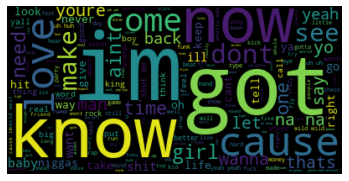

In [82]:
# Display the generated image:
plt.imshow(EC_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
## South
S_wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(lyrics_South["Lyrics"]))

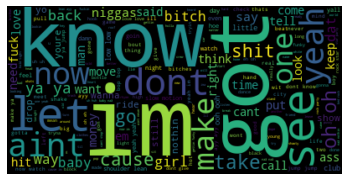

In [84]:
# Display the generated image:
plt.imshow(S_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
## Midwest
MW_wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(lyrics_Midwest["Lyrics"]))

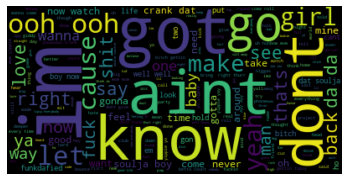

In [86]:
# Display the generated image:
plt.imshow(MW_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [87]:
## West Coast
W_wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(lyrics_WestCoast["Lyrics"]))

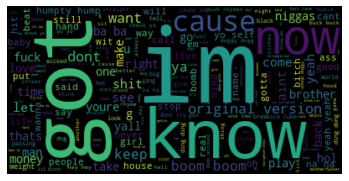

In [88]:
# Display the generated image:
plt.imshow(W_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
## World
World_wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(lyrics_World["Lyrics"]))

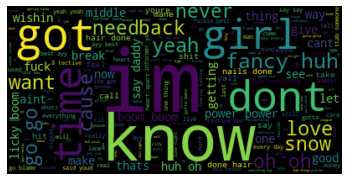

In [90]:
# Display the generated image:
plt.imshow(World_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#####  Wordclouds to image

In [166]:
## Custom color for East Coast
def multi_color_func_EC(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[43, 100, 47],
              [137, 100, 27],
              [258, 100, 35],
              [226, 100, 46]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

In [167]:
## East Coast
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\PhillySans.otf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\East Region.png"))
EC_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "white", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         color_func = multi_color_func_EC).generate(' '.join(lyrics_EastCoast["Lyrics"]))

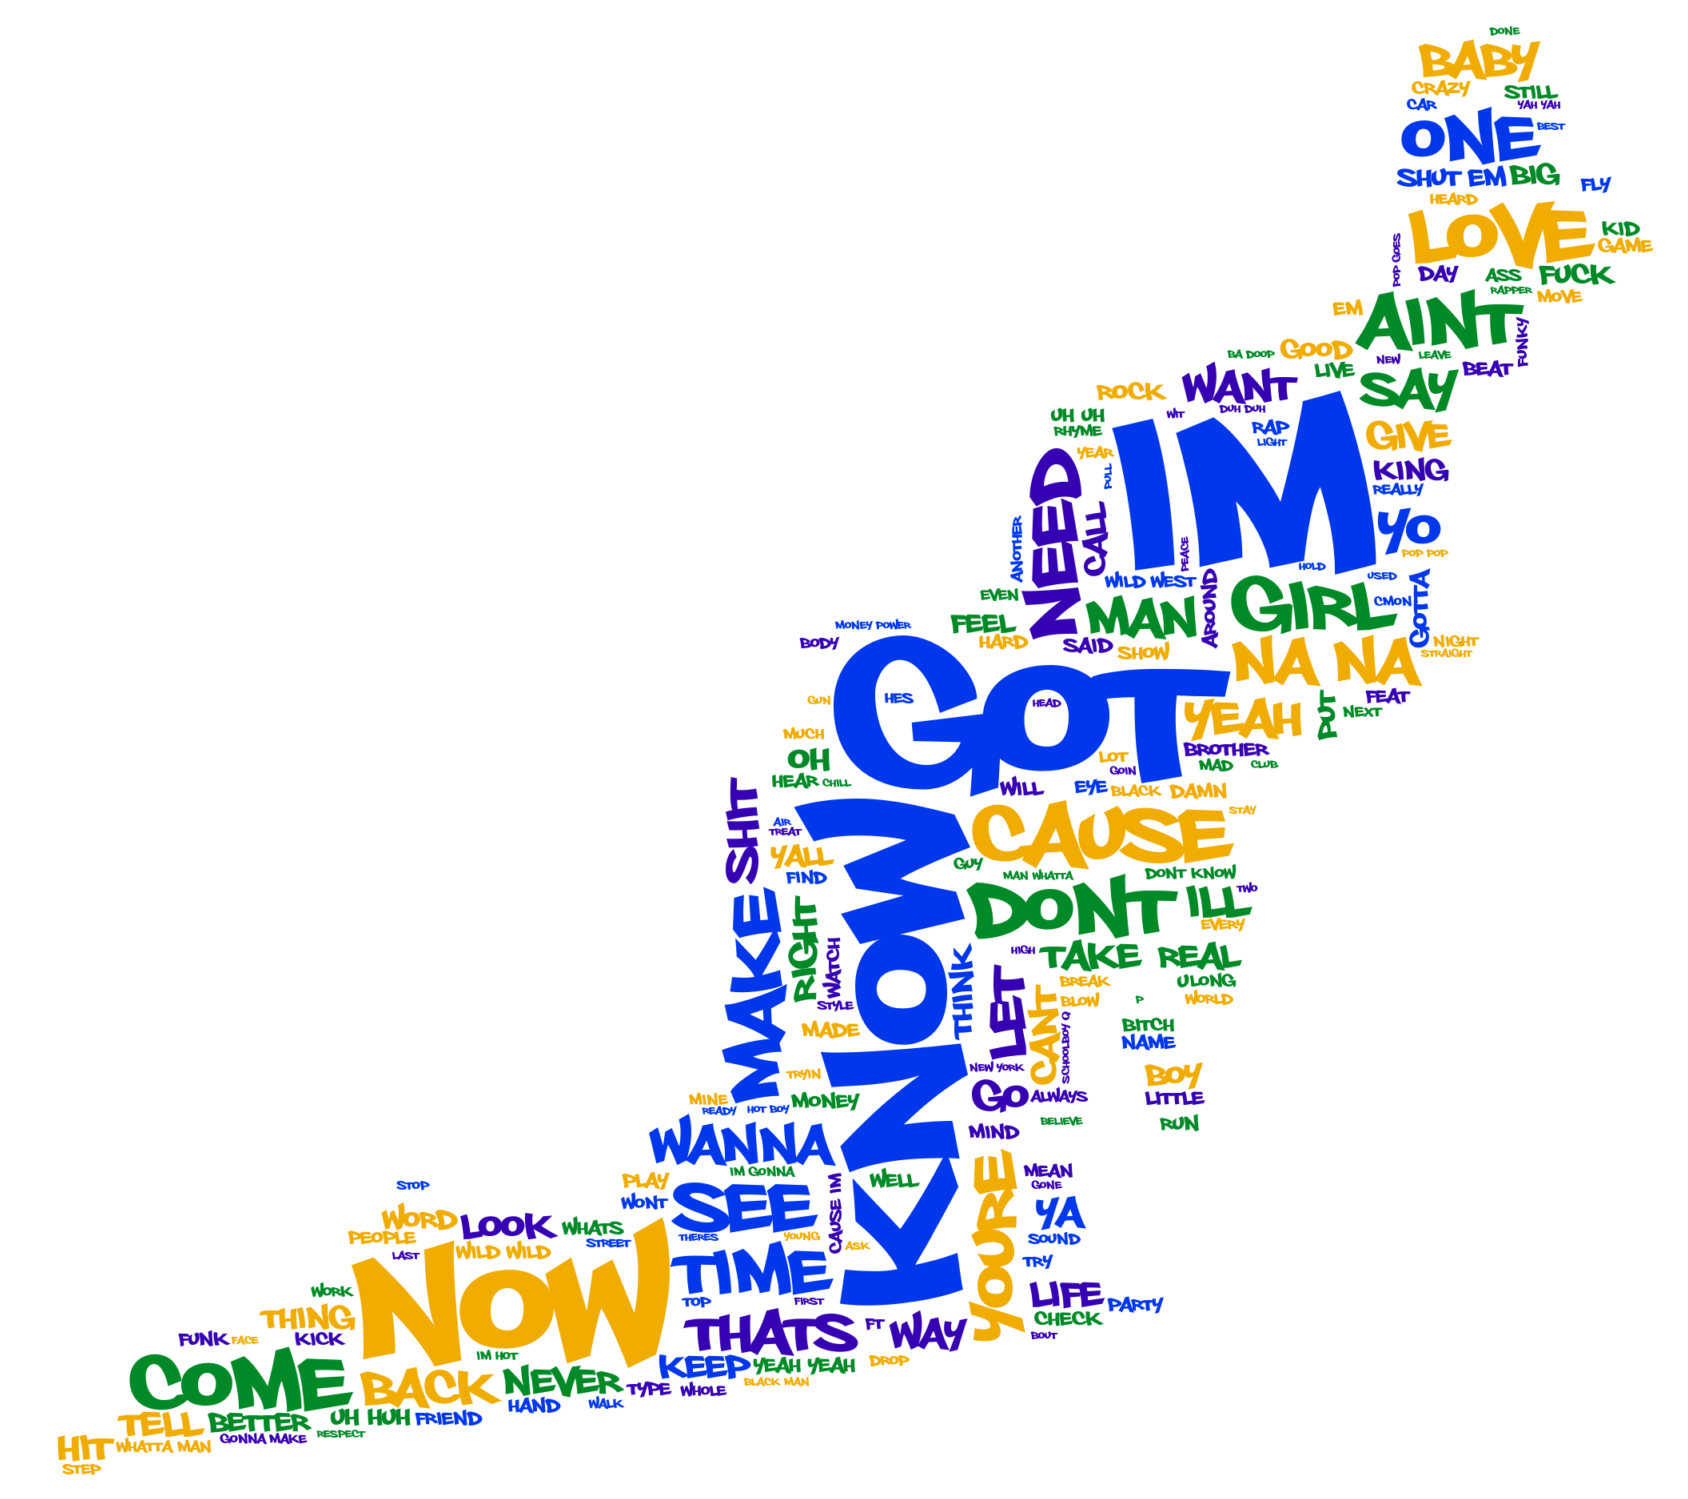

In [168]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(EC_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [169]:
## Custom color for South
def multi_color_func_S(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[49, 100, 47],
              [186, 100, 47],
              [27, 100, 47],
              [320, 100, 47]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

In [170]:
## South
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\Blank River.ttf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\South Region.png"))
S_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "white", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         color_func = multi_color_func_S).generate(' '.join(lyrics_South["Lyrics"]))

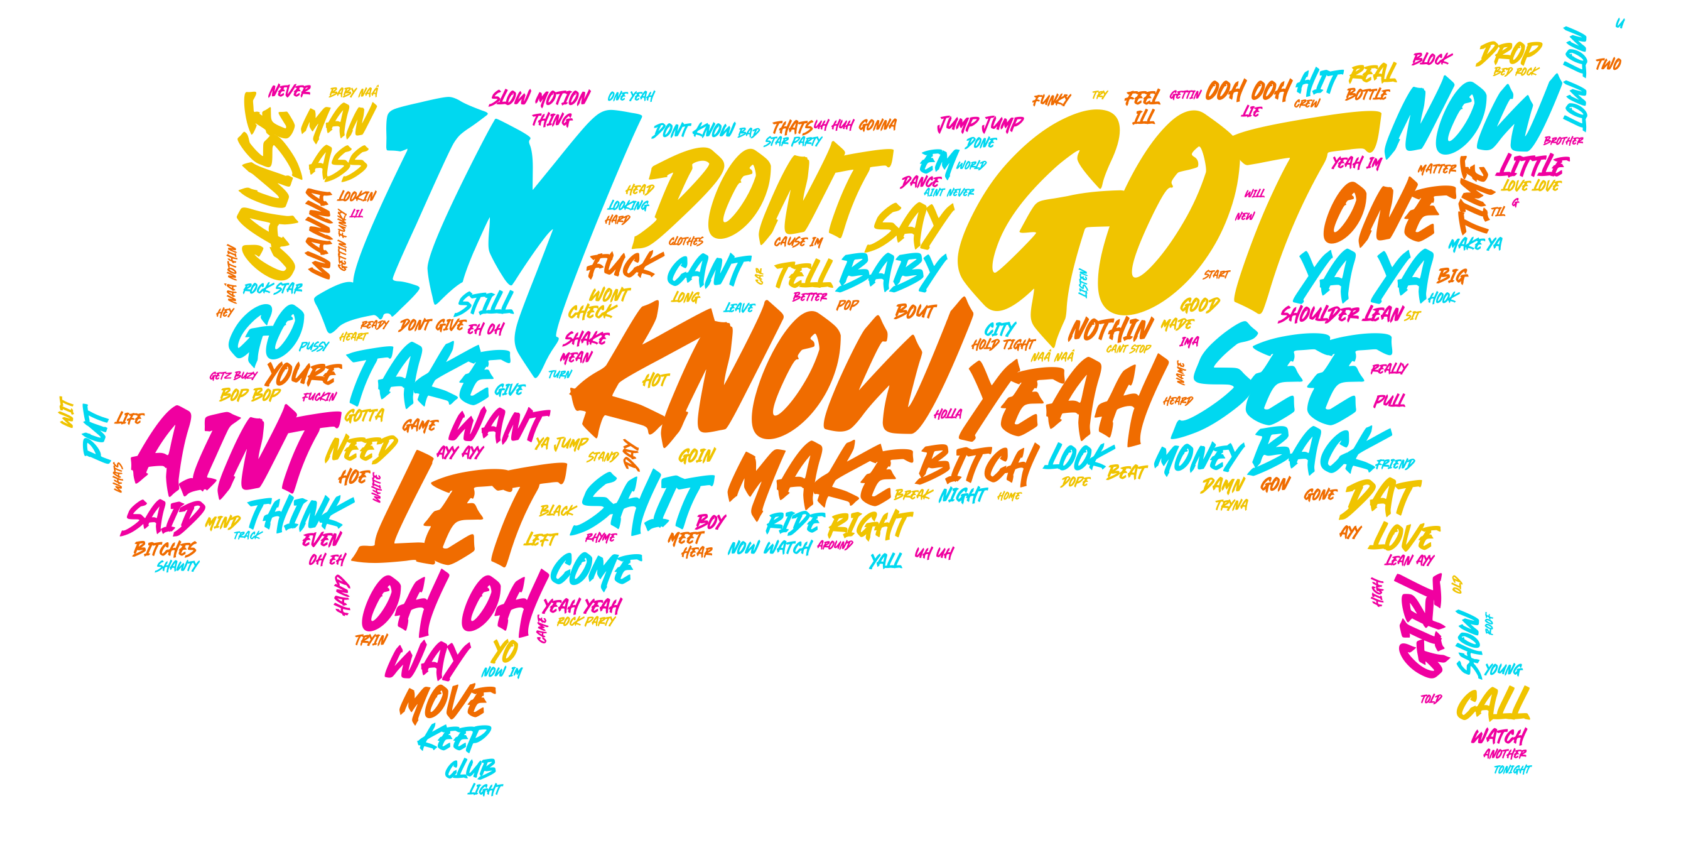

In [171]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(S_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [180]:
## Custom color for Midwest
def multi_color_func_MW(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[360, 80, 46],
              [108, 82, 15],
              [25, 88, 41],
              [229, 75, 53]]              
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

In [186]:
## Midwest
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\Detroit DEMO.ttf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\Midwest Region.png"))
MW_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "white", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         colormap = "summer").generate(' '.join(lyrics_Midwest["Lyrics"]))

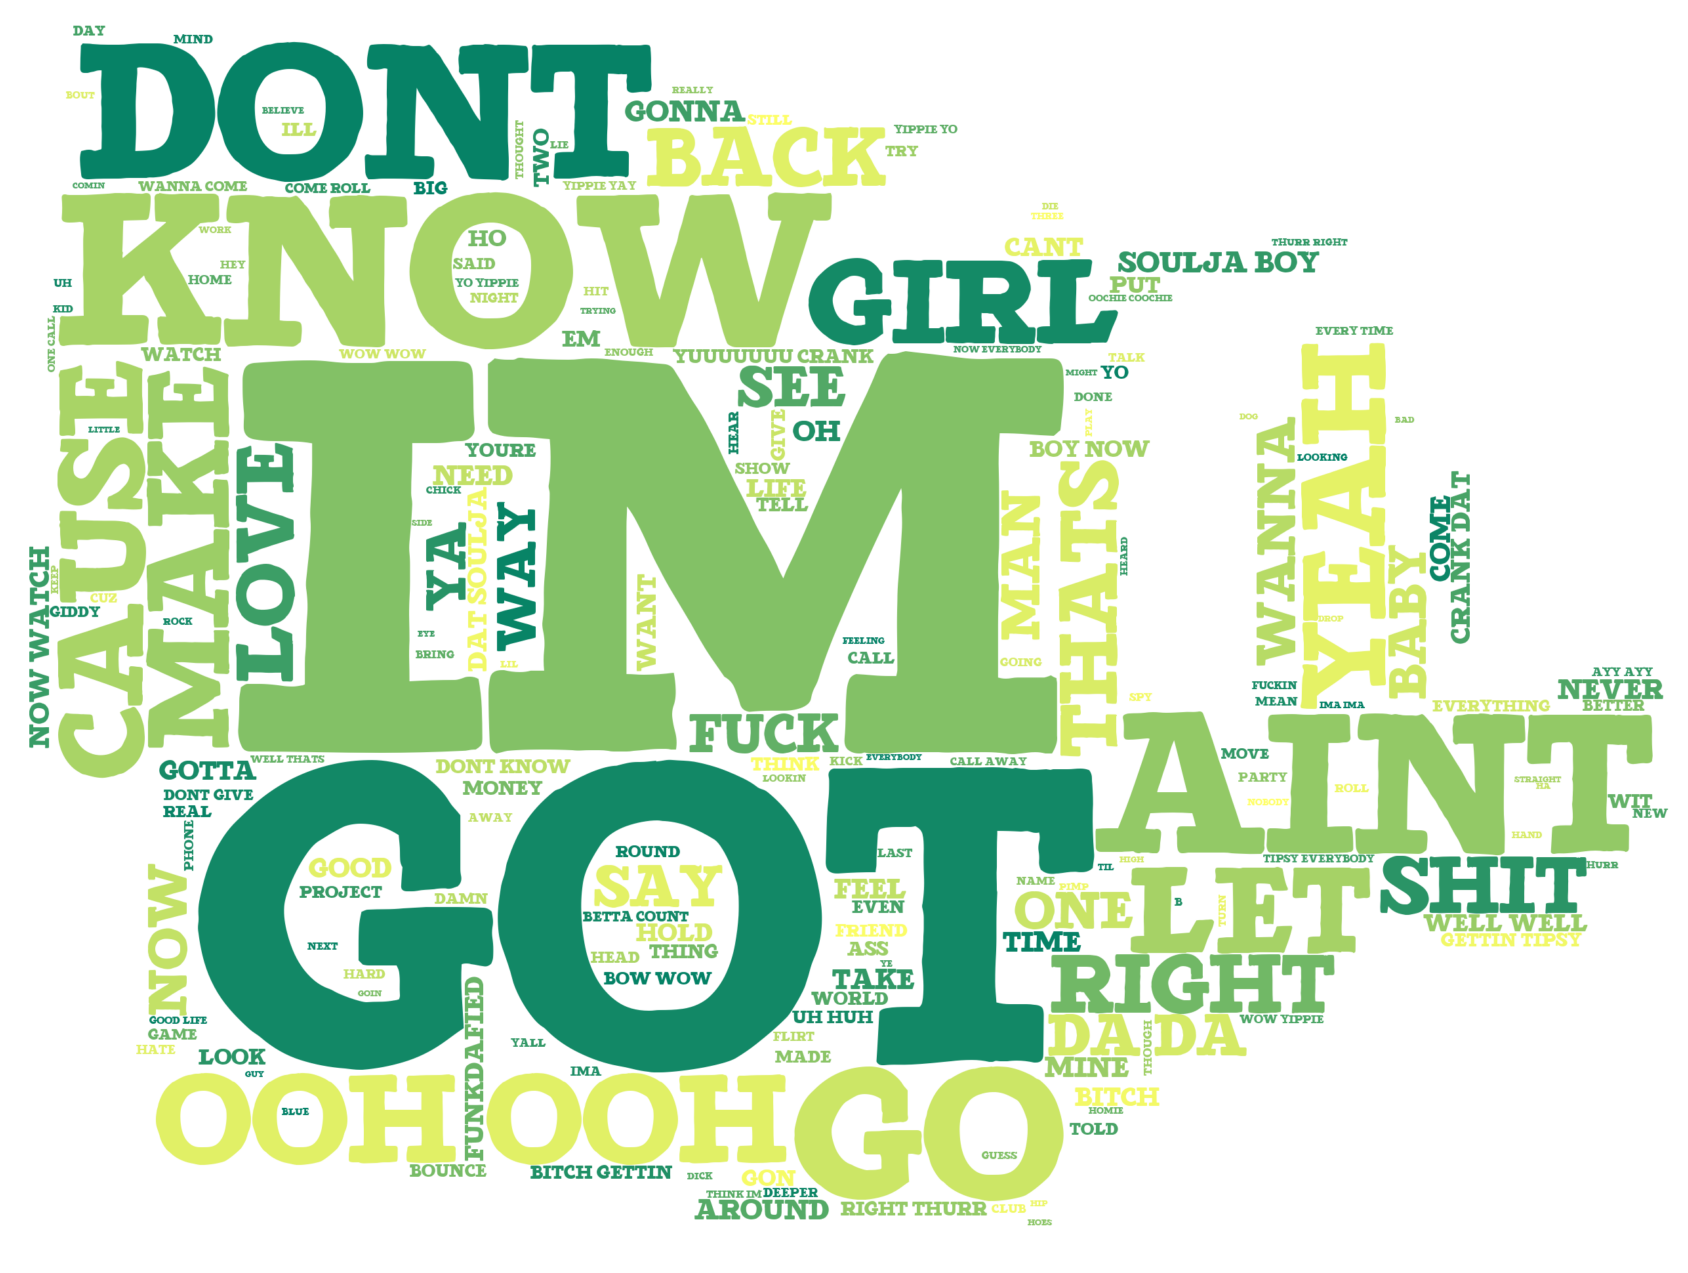

In [187]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(MW_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [188]:
## Custom color for West Coast
def multi_color_func_WC(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[149, 99, 32],
              [108, 82, 15],
              [36, 99, 47],
              [259, 73, 39]]              
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

In [212]:
## West Coast
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\\HollywoodHills.ttf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\West Coast.png"))
W_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "white", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         colormap = "magma").generate(' '.join(lyrics_WestCoast["Lyrics"]))

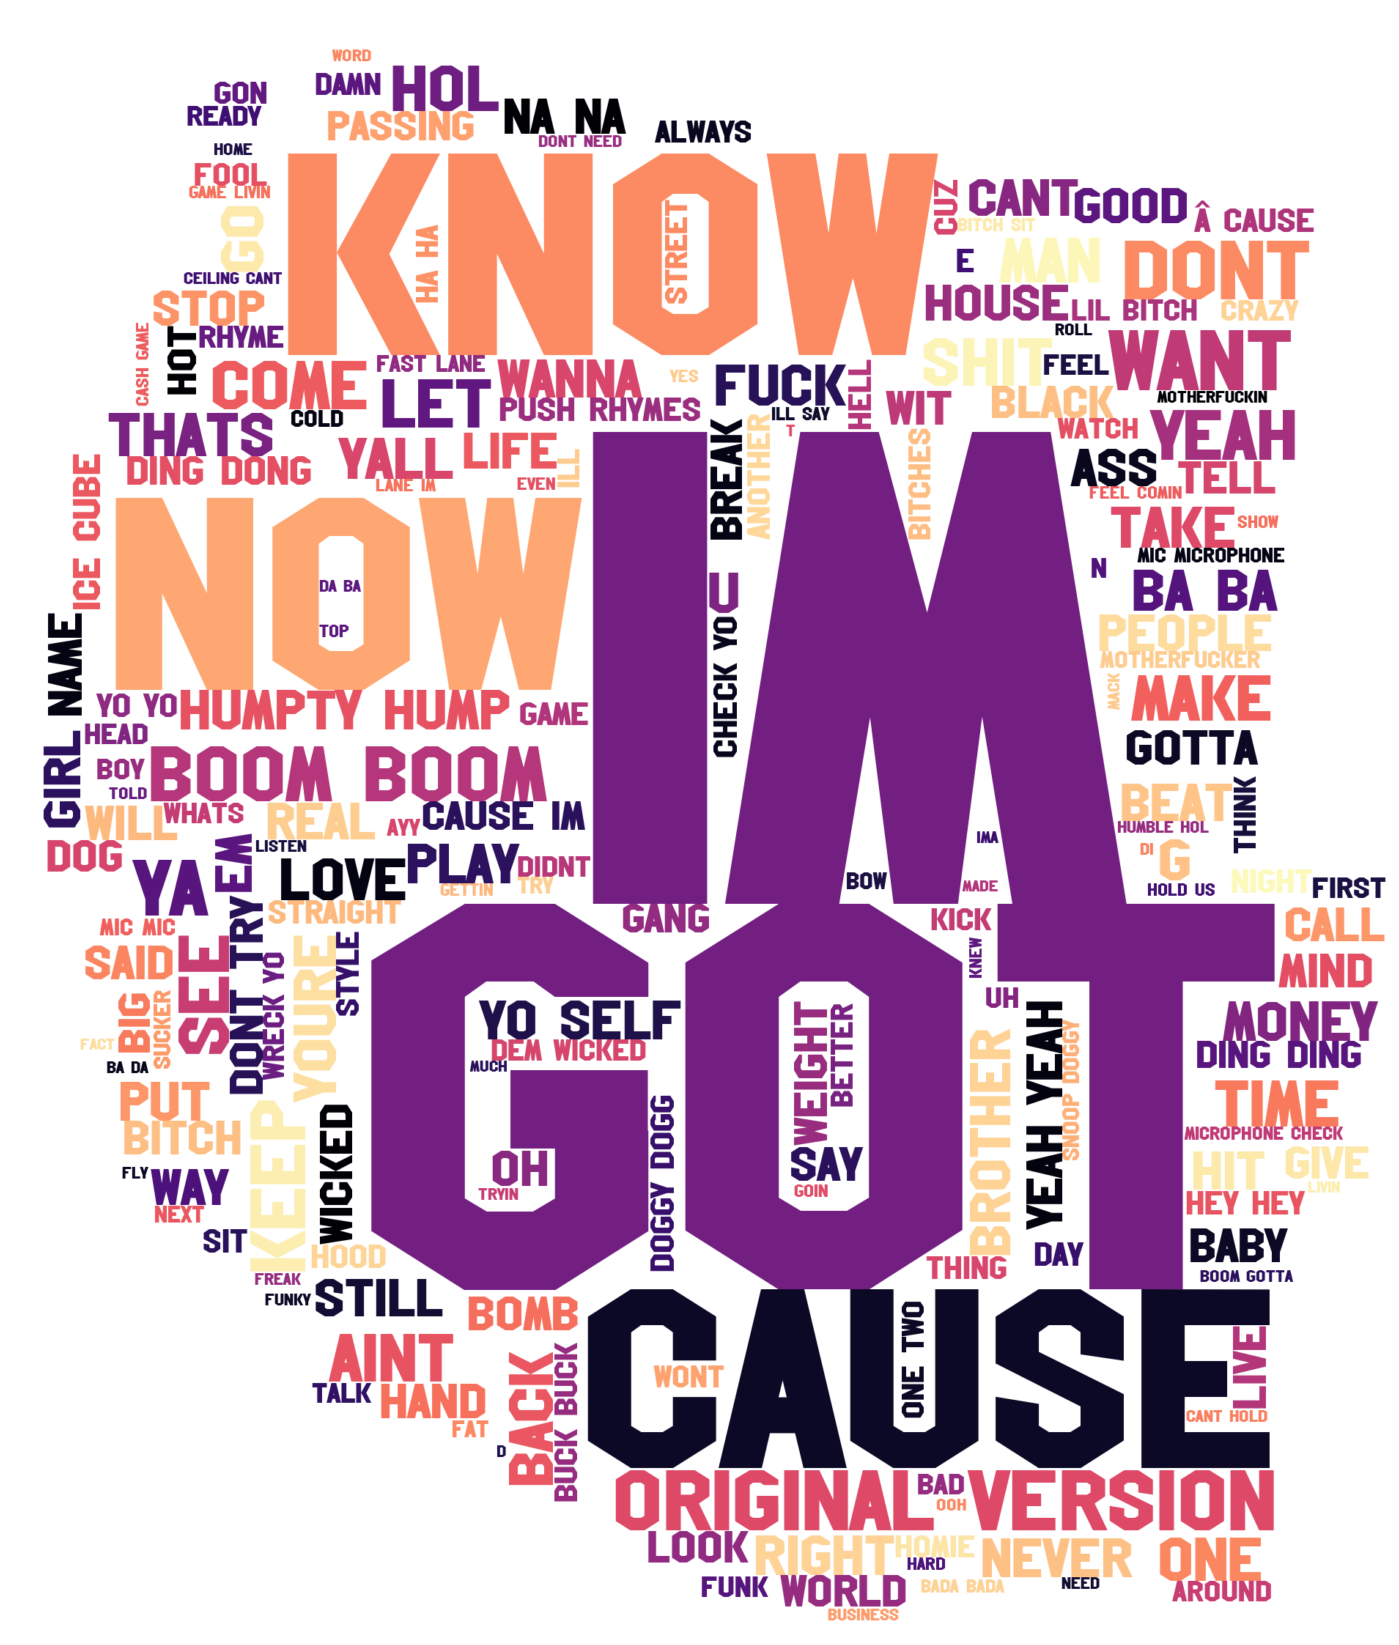

In [204]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(W_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [240]:
## World
font_path = "C:\\Windows\Fonts\BRLNSR.ttf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\\vecteezy_world-planet-earth-isolated-icon-vector-illustration-design_1838945\\2698_R1NUIEpPUyAwMDUtMTM.jpg"))
mask_colors = ImageColorGenerator(mask)
World_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "white", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         color_func = mask_colors).generate(' '.join(lyrics_World["Lyrics"]))

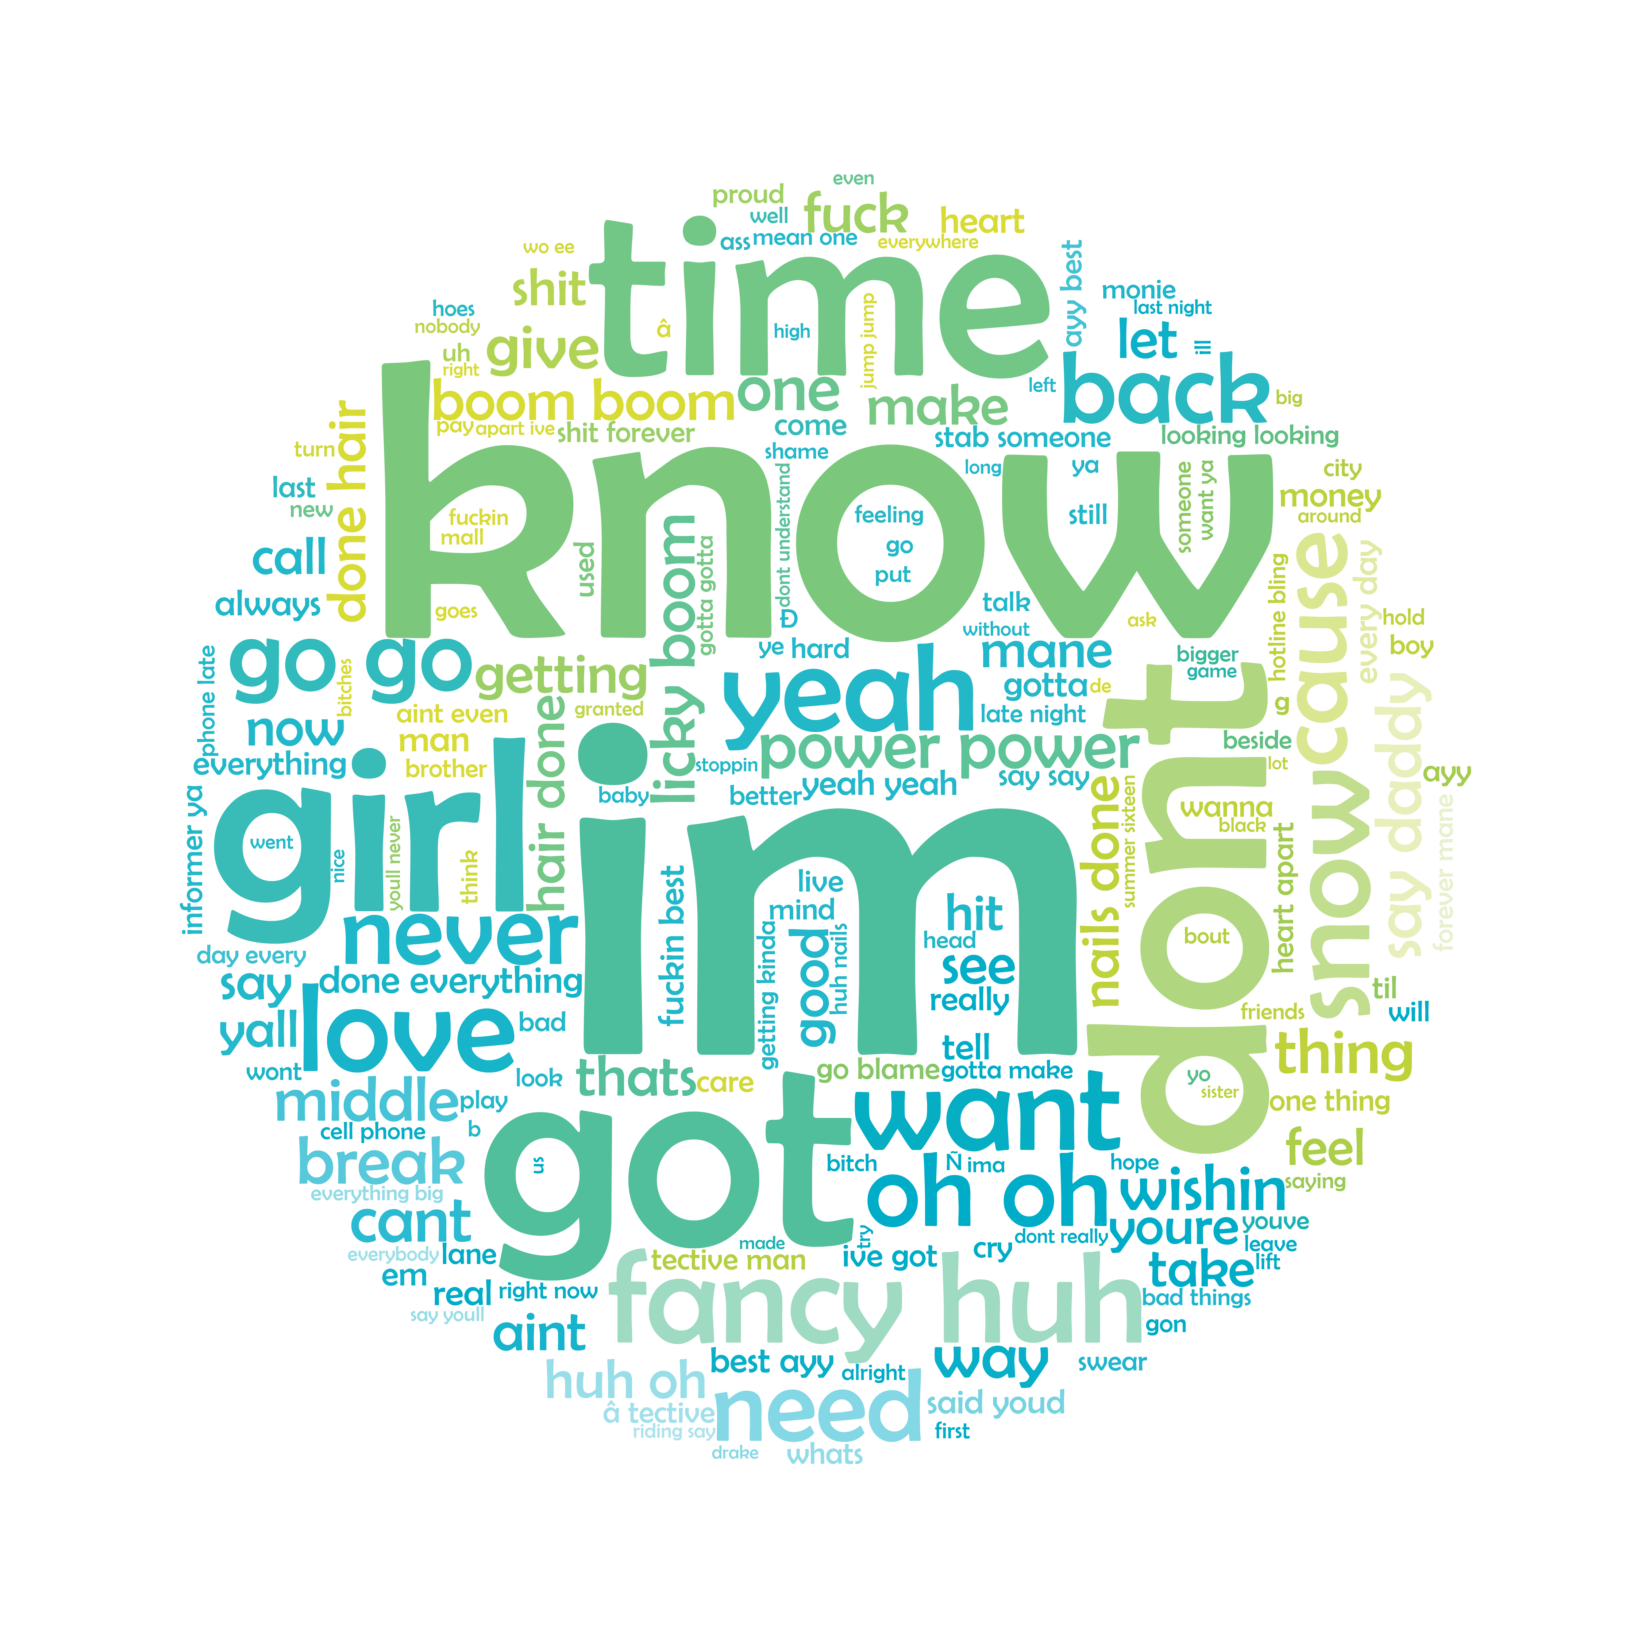

In [217]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(World_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Looking at word clouds by decade to image

In [259]:
## 1990s
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\SivarPro.otf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\90s.png"))
nineties_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "black", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         colormap = "YlGn").generate(' '.join(lyrics_nineties["Lyrics"]))

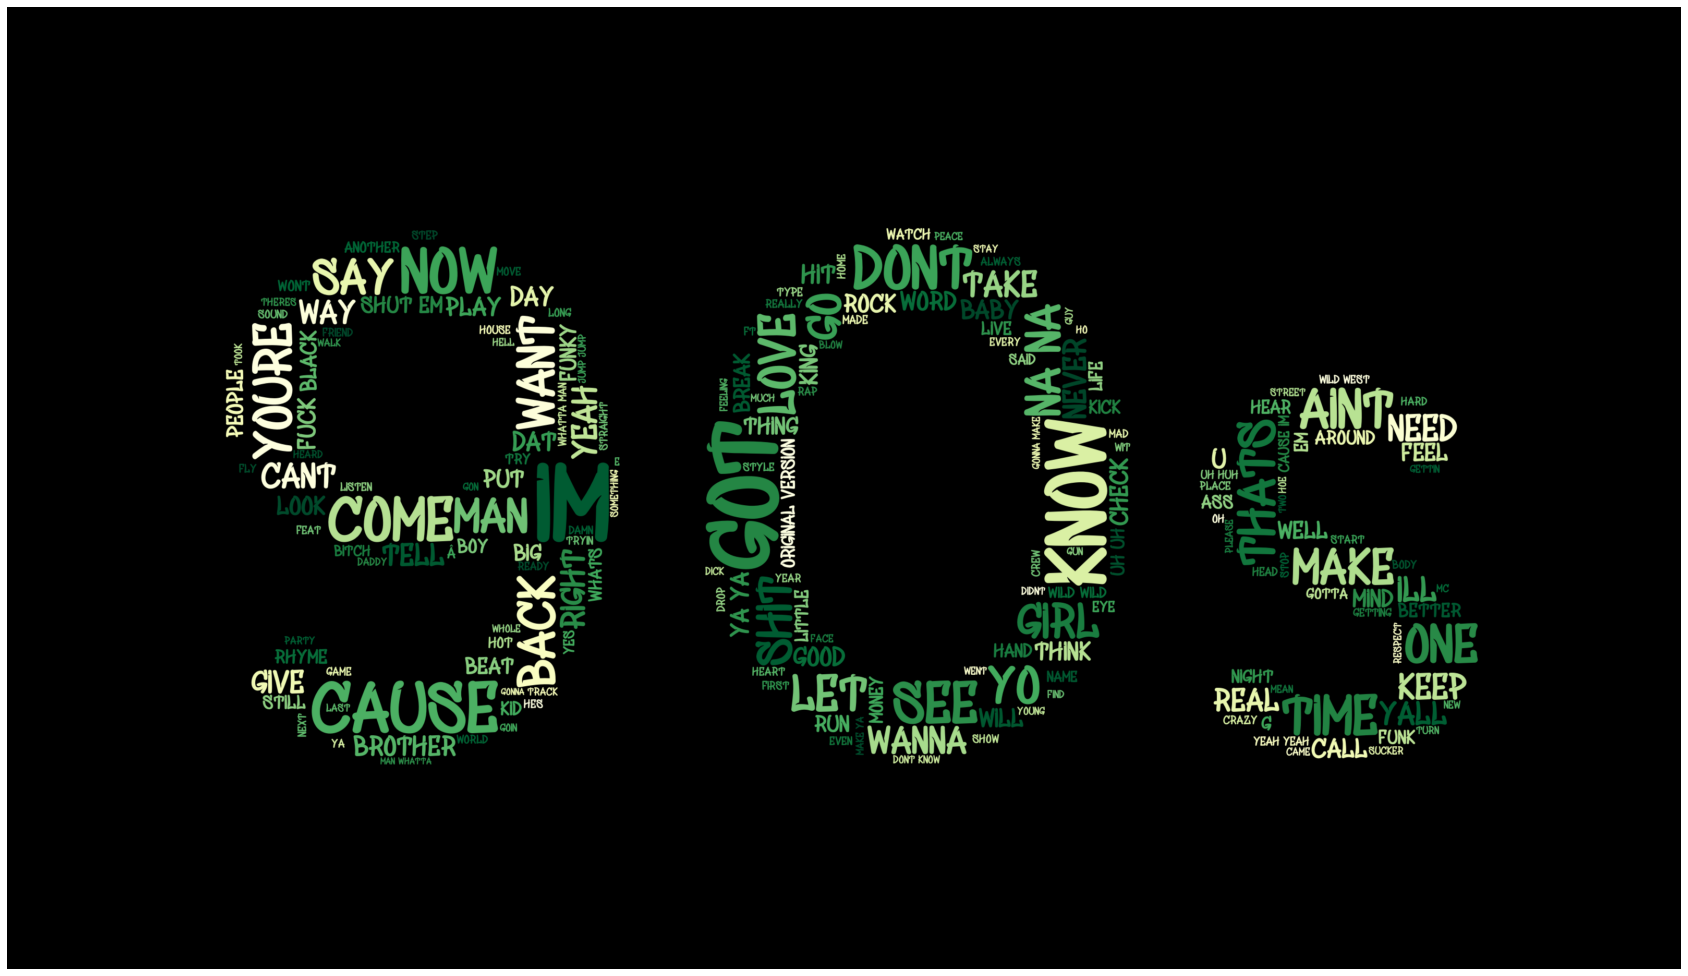

In [260]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(nineties_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [261]:
## 2000s
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\SivarPro.otf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\\00s.png"))
zeroes_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "black", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         colormap = "OrRd").generate(' '.join(lyrics_zeros["Lyrics"]))

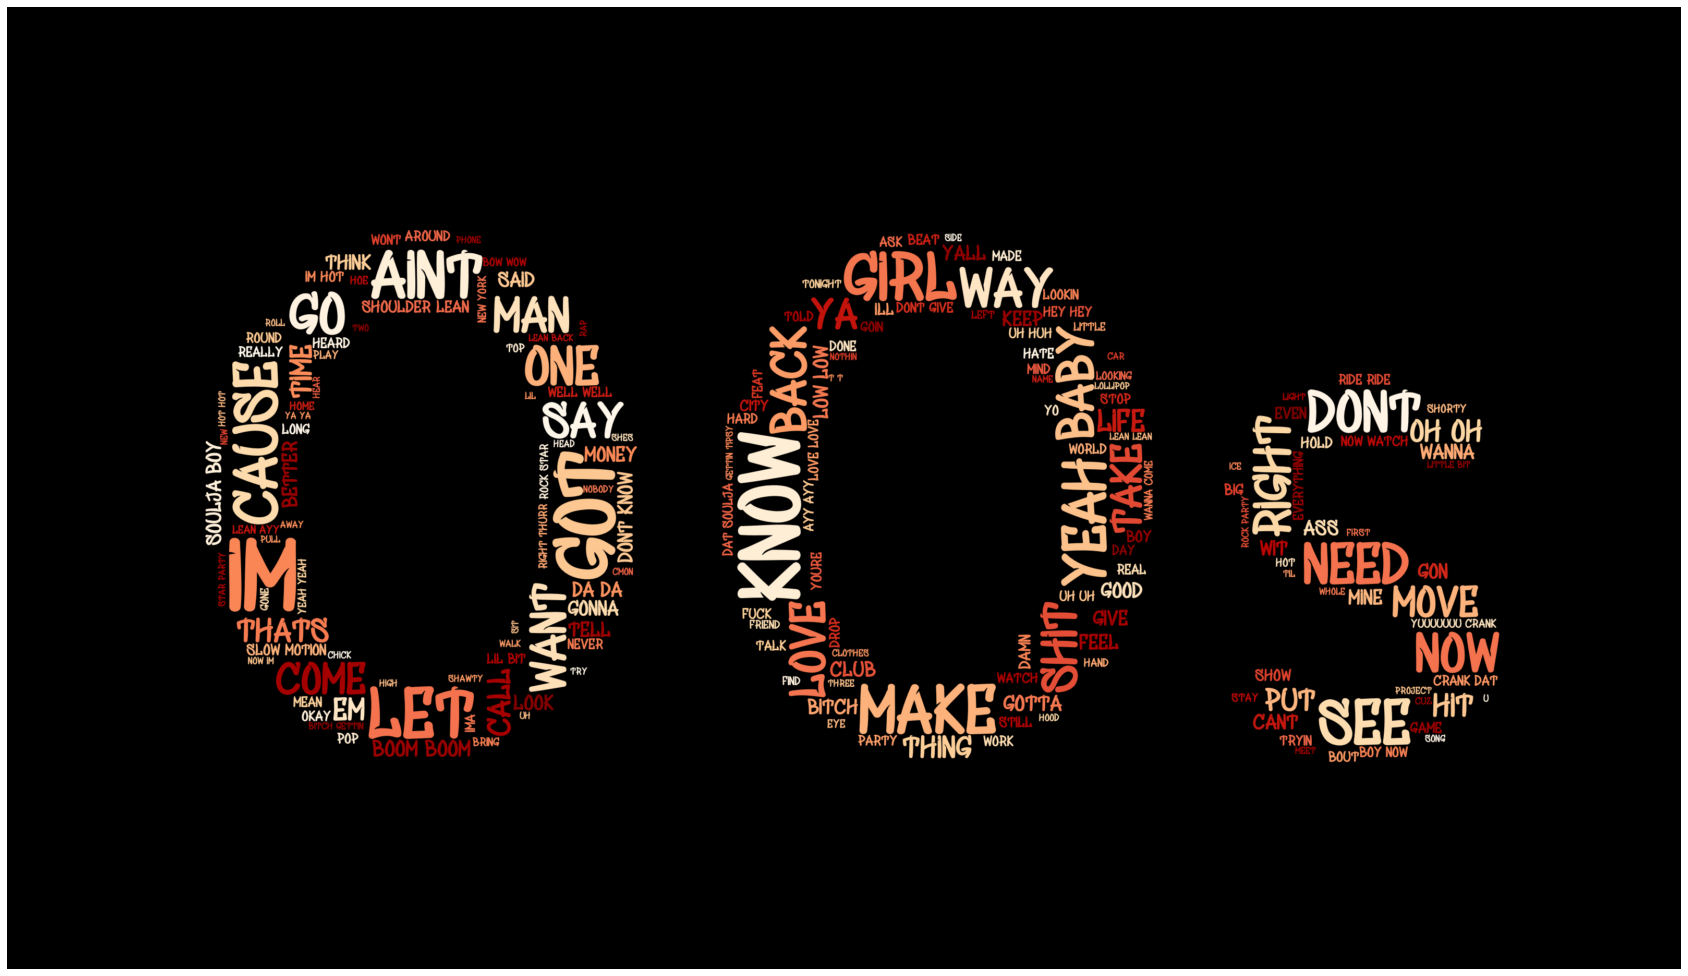

In [262]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(zeroes_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [264]:
## 2010s
font_path = "C:\\Users\ergil\AppData\Local\Microsoft\Windows\Fonts\SivarPro.otf"
mask = np.array(Image.open("C:\\Users\ergil\Documents\SU iSchool MS in Applied Data Science\Classes\IST 736 - Text Mining\Final Project\\10s.png"))
tens_wordcloud2 = WordCloud(stopwords = stopwords, background_color = "black", 
                         width = mask.shape[1], height = mask.shape[0],
                         font_path = font_path, mask = mask, mode = "RGBA",
                         colormap = "BuPu").generate(' '.join(lyrics_tens["Lyrics"]))

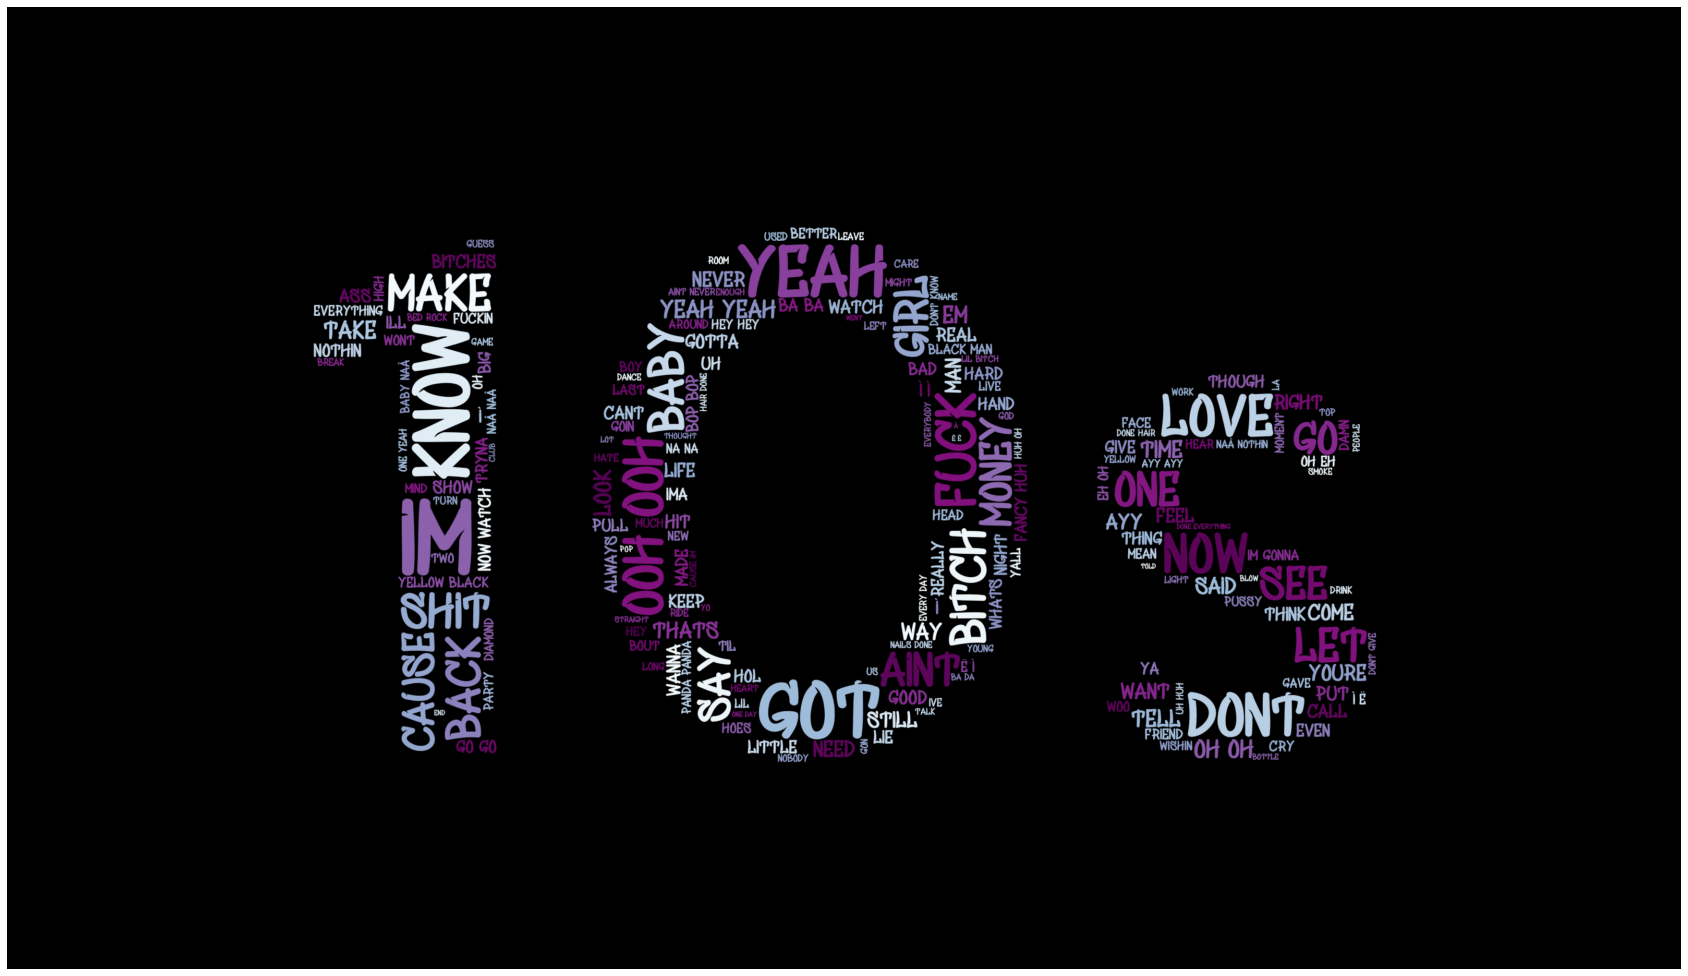

In [265]:
# Display the generated image:
plt.figure(figsize = (30,30))
plt.imshow(tens_wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()